# Minor Project:  Water Quality Prediction
## B.Tech 3rd Year (CHE) 
## Roll No. 19112104
### 

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sb
#importing numpy and pandas to read the dataset and perform mathematical operations on the dataset, using these python libraries.


In [2]:
data=pd.read_csv(r"C:\Users\asus\Desktop\DA\water_dataX (1).csv",encoding="ISO-8859-1")




In [3]:
data= data.replace(r'^\s*$', np.nan, regex=True)
#this replaces every blank value in the dataset with NaN

In [4]:
new_data=data.copy()

In [5]:
new_data.dtypes

STATION CODE                        object
LOCATIONS                           object
STATE                               object
Temp                                object
D.O. (mg/l)                         object
PH                                  object
CONDUCTIVITY (µmhos/cm)             object
B.O.D. (mg/l)                       object
NITRATENAN N+ NITRITENANN (mg/l)    object
FECAL COLIFORM (MPN/100ml)          object
TOTAL COLIFORM (MPN/100ml)Mean      object
year                                 int64
dtype: object

# Data Pre-Processing
1. "pd.to_numeric" converts any arguemnt passed through it into numeric data type,either float64 or int64 depending on the type of data supplied.

2. This step is important as it will convert all the type of data in the dataset into numeric dtype and then mathematical operations can be performed on it.

3. errors= 'coerce', will convert any invalid entry into NaN value.

In [6]:
#CONVERSIONS

new_data['Temp']=pd.to_numeric(new_data['Temp'],errors='coerce')
new_data['D.O. (mg/l)']=pd.to_numeric(new_data['D.O. (mg/l)'],errors='coerce')
new_data['PH']=pd.to_numeric(new_data['PH'],errors='coerce')
new_data['B.O.D. (mg/l)']=pd.to_numeric(new_data['B.O.D. (mg/l)'],errors='coerce')
new_data['CONDUCTIVITY (µmhos/cm)']=pd.to_numeric(new_data['CONDUCTIVITY (µmhos/cm)'],errors='coerce')
new_data['NITRATENAN N+ NITRITENANN (mg/l)']=pd.to_numeric(new_data['NITRATENAN N+ NITRITENANN (mg/l)'],errors='coerce')
new_data['TOTAL COLIFORM (MPN/100ml)Mean']=pd.to_numeric(new_data['TOTAL COLIFORM (MPN/100ml)Mean'],errors='coerce')
new_data.dtypes

STATION CODE                         object
LOCATIONS                            object
STATE                                object
Temp                                float64
D.O. (mg/l)                         float64
PH                                  float64
CONDUCTIVITY (µmhos/cm)             float64
B.O.D. (mg/l)                       float64
NITRATENAN N+ NITRITENANN (mg/l)    float64
FECAL COLIFORM (MPN/100ml)           object
TOTAL COLIFORM (MPN/100ml)Mean      float64
year                                  int64
dtype: object

#  Taking an overview of the given dataset.

1. describe() function is used to find out an overall summary of the data, like mean value, minimum and maximum etc of any givem parameter.
2. This is helpful in checking for any major inconsistencies in the dataset.
3. For example in this case, mean pH value is 67115, which is absurd as pH ranges from 0 to 14, this means we need to fix these inconsistencies in the pH column.
4. Also if we see closely for year 2003, all the entries except Temp is either 0.00 or very low than normal so we'll drop this row as well.

In [7]:
new_data.describe()

,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),TOTAL COLIFORM (MPN/100ml)Mean,year
count,1899.000000,1960.000000,1983.000000,1966.000000,1948.000000,1766.000000,1.859000e+03,1991.000000
mean,26.209814,6.392637,112.090674,1786.466394,6.940049,1.623079,5.336872e+05,2010.038172
std,3.366388,1.332938,1878.930716,5552.276223,29.400026,4.090481,1.423428e+07,3.057333
min,10.000000,0.000000,0.000000,0.400000,0.100000,0.000000,0.000000e+00,2003.000000
25%,24.750000,5.900000,6.900000,78.000000,1.200000,0.240000,1.060000e+02,2008.000000
50%,27.000000,6.700000,7.300000,183.000000,1.896500,0.516000,4.680000e+02,2011.000000
75%,28.400000,7.200000,7.700000,592.750000,3.600000,1.500000,1.919000e+03,2013.000000
max,35.000000,11.400000,67115.000000,65700.000000,534.500000,108.700000,5.110909e+08,2014.000000


In [8]:
#In this step we will remove all the rows where ph>14 or pH<0.
new_data.drop(new_data[new_data.PH>14].index, inplace=True)
new_data.drop(new_data[new_data.PH<0].index, inplace=True)
new_data.drop(new_data[new_data.year==2003].index, inplace=True)

# Data Pre-Processing

1. Next step is done to store the data of different columns from the current dataframe into some different variables.
2. Reason behind doing this is the ease in performing operations on data, using some easy-to-call variable than their current names and eliminating unnecessary variables.
3. Making data ready for analysis.

In [9]:
#initialization
#This is step is basically for storing the data in some other variables, in order to perform required mathematical operations and store result separately.

start=0
end=1990

station=new_data.iloc [start:end ,0]

location=new_data.iloc [start:end ,1]

state=new_data.iloc [start:end ,2]

do= new_data.iloc [start:end ,4].astype(np.float64)
value=0

ph = new_data.iloc[ start:end,5]  

co = new_data.iloc [start:end ,6].astype(np.float64)   
  
year= new_data.iloc[start:end,11]

tc= new_data.iloc [start:end ,10].astype(np.float64)

bod = new_data.iloc [start:end ,7].astype(np.float64)

na= new_data.iloc [start:end ,8].astype(np.float64)

na.dtype


dtype('float64')

In [10]:
new_data=pd.concat([station,location,state,do,ph,co,bod,na,tc,year],axis=1)
new_data.columns = ['station','location','state','do','ph','co','bod','na','tc','year']

In [11]:
new_data

,station,location,state,do,ph,co,bod,na,tc,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,6.7,7.50,203.0,NaN,0.100,27.0,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,5.7,7.20,189.0,2.000,0.200,8391.0,2014
2,1475,ZUARI AT PANCHAWADI,GOA,6.3,6.90,179.0,1.700,0.100,5330.0,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,5.8,6.90,64.0,3.800,0.500,8443.0,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,5.8,7.30,83.0,1.900,0.400,5500.0,2014
...,...,...,...,...,...,...,...,...,...,...
1896,NAN,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,6.6,7.81,603.2,2.675,0.263,191.0,2005
1897,NAN,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,6.6,7.49,571.5,2.091,0.256,273.0,2005
1898,NAN,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,5.4,7.16,75.8,2.092,NaN,513.0,2005
1899,NAN,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,5.4,7.37,104.8,1.802,0.215,557.0,2005


In [12]:
new_data.describe()

,do,ph,co,bod,na,tc,year
count,1871.000000,1894.000000,1877.000000,1859.000000,1712.000000,1.771000e+03,1901.000000
mean,6.354072,7.227987,1870.865440,6.855576,1.657830,5.601233e+05,2010.370331
std,1.343861,0.650047,5668.584319,27.682197,4.149109,1.458333e+07,2.710534
min,0.000000,0.000000,11.000000,0.100000,0.000000,0.000000e+00,2005.000000
25%,5.900000,6.900000,87.000000,1.200000,0.240000,1.015000e+02,2008.000000
50%,6.700000,7.300000,198.000000,1.900000,0.520000,4.650000e+02,2011.000000
75%,7.100000,7.600000,625.000000,3.633500,1.580000,1.929000e+03,2013.000000
max,11.400000,9.010000,65700.000000,534.500000,108.700000,5.110909e+08,2014.000000


# Calculation of Water Qualitty Index

1. WQI or Water Quality Index is calculated using several methods.
2. Here, the parameters used for calculating WQI are pH, Dissolved Oxygen, Biological Oxygen Demand, Total Cholifrom, Conductivity, Dissolved Nitrates.
3. WQI is calculted by using the scores (out of 100) of each parameter multiplied by their respective weights, and then adding all of them together.
4. These scores represent the numbers corresponding each parameter, assigned to them on the basis of desirability, for example pH value of water should be between 7 and 8.5 (both inclusive), so this range is appointed a score of 100 (best), and similarily High Total Coliform (>=80, <=125) content is very undesriable , so it has been appointed a score of 40 (poor)


In [13]:
#calulation of Ph Score 
#These scores are out of 100, where 0 being least desirable 100 being most desirable.
new_data['npH']=new_data.ph.apply(lambda x: (100 if (8.5>=x>=7)  
                                 else(80 if  (8.6>=x>=8.5) or (6.9>=x>=6.8) 
                                      else(60 if (8.8>=x>=8.6) or (6.8>=x>=6.7) 
                                          else(40 if (9>=x>=8.8) or (6.7>=x>=6.5)
                                              else 0)))))


In [14]:
#calculation of dissolved oxygen Score
new_data['ndo']=new_data.do.apply(lambda x:(100 if (x>=6)  
                                 else(80 if  (6>=x>=5.1) 
                                      else(60 if (5>=x>=4.1)
                                          else(40 if (4>=x>=3) 
                                              else 0)))))

In [15]:
#calculation of total coliform Score
new_data['nco']=new_data.tc.apply(lambda x:(100 if (5>=x>=0)  
                                 else(80 if  (50>=x>=5) 
                                      else(60 if (500>=x>=50)
                                          else(40 if (10000>=x>=500) 
                                              else 0)))))

In [16]:
#calc of B.D.O Score
new_data['nbdo']=new_data.bod.apply(lambda x:(100 if (3>=x>=0)  
                                 else(80 if  (6>=x>=3) 
                                      else(60 if (80>=x>=6)
                                          else(40 if (125>=x>=80) 
                                              else 0)))))

In [17]:
#calculation of electrical conductivity Score
new_data['nec']=new_data.co.apply(lambda x:(100 if (75>=x>=0)  
                                 else(80 if  (150>=x>=75) 
                                      else(60 if (225>=x>=150)
                                          else(40 if (300>=x>=225) 
                                              else 0)))))


In [18]:
#Calulation of nitrate Score
new_data['nna']=new_data.na.apply(lambda x:(100 if (20>=x>=0)  
                                 else(80 if  (50>=x>=20) 
                                      else(60 if (100>=x>=50)
                                          else(40 if (200>=x>=100) 
                                              else 0)))))

new_data.head()
new_data.dtypes

station      object
location     object
state        object
do          float64
ph          float64
co          float64
bod         float64
na          float64
tc          float64
year          int64
npH           int64
ndo           int64
nco           int64
nbdo          int64
nec           int64
nna           int64
dtype: object

In [19]:
#Multiplying Parameter Scores to their respective weight, and then adding them all to calculate WQI

new_data['wph']=new_data.npH * 0.165
new_data['wdo']=new_data.ndo * 0.281
new_data['wbdo']=new_data.nbdo * 0.234
new_data['wec']=new_data.nec* 0.009
new_data['wna']=new_data.nna * 0.028
new_data['wco']=new_data.nco * 0.281
new_data['wqi']=new_data.wph+new_data.wdo+new_data.wbdo+new_data.wec+new_data.wna+new_data.wco 
new_data


,station,location,state,do,ph,co,bod,na,tc,year,...,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,6.7,7.50,203.0,NaN,0.100,27.0,2014,...,0,60,100,16.5,28.10,0.00,0.54,2.8,22.48,70.42
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,5.7,7.20,189.0,2.000,0.200,8391.0,2014,...,100,60,100,16.5,22.48,23.40,0.54,2.8,11.24,76.96
2,1475,ZUARI AT PANCHAWADI,GOA,6.3,6.90,179.0,1.700,0.100,5330.0,2014,...,100,60,100,13.2,28.10,23.40,0.54,2.8,11.24,79.28
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,5.8,6.90,64.0,3.800,0.500,8443.0,2014,...,80,100,100,13.2,22.48,18.72,0.90,2.8,11.24,69.34
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,5.8,7.30,83.0,1.900,0.400,5500.0,2014,...,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896,NAN,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,6.6,7.81,603.2,2.675,0.263,191.0,2005,...,100,0,100,16.5,28.10,23.40,0.00,2.8,16.86,87.66
1897,NAN,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,6.6,7.49,571.5,2.091,0.256,273.0,2005,...,100,0,100,16.5,28.10,23.40,0.00,2.8,16.86,87.66
1898,NAN,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,5.4,7.16,75.8,2.092,NaN,513.0,2005,...,100,80,0,16.5,22.48,23.40,0.72,0.0,11.24,74.34
1899,NAN,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,5.4,7.37,104.8,1.802,0.215,557.0,2005,...,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14


In [20]:
#In this step, mean WQI value is calculated for each year and then data is grouped year-wise.
WQI_total=new_data.groupby('year')['wqi'].mean()

In [21]:
WQI_total


year
2005    72.111429
2006    71.224571
2007    72.549000
2008    72.570943
2009    74.085193
2010    74.648723
2011    75.647013
2012    78.969041
2013    75.009425
2014    76.853551
Name: wqi, dtype: float64

In [22]:
new_data=WQI_total.reset_index(level=0,inplace=False)
new_data


,year,wqi
0,2005,72.111429
1,2006,71.224571
2,2007,72.549000
3,2008,72.570943
4,2009,74.085193
5,2010,74.648723
6,2011,75.647013
7,2012,78.969041
8,2013,75.009425
9,2014,76.853551


In [23]:
new_data = new_data[np.isfinite(new_data['wqi'])]


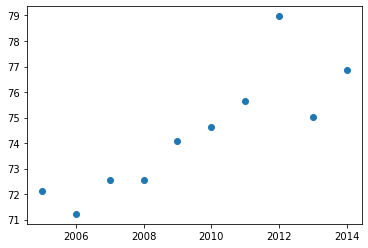

In [24]:
#scatter plot of data points
import matplotlib.pyplot as plt
cols =['year']
y = new_data['wqi']
x=new_data[cols]

plt.scatter(x,y)
plt.show()

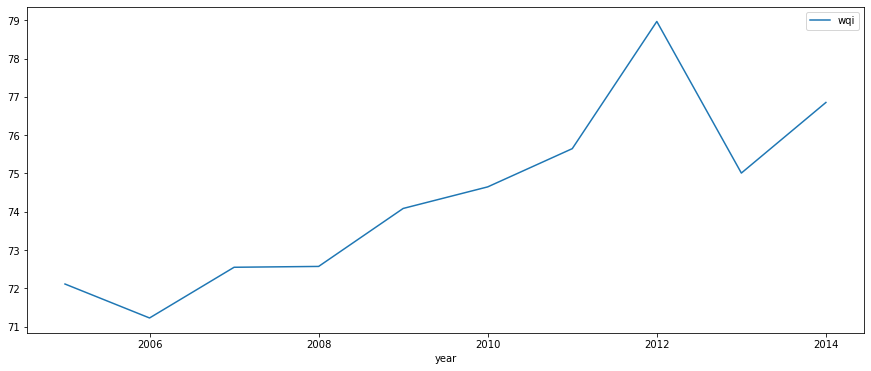

In [25]:
import matplotlib.pyplot as plt
new_data=new_data.set_index('year')
new_data.plot(figsize=(15,6))

plt.show()

In [26]:
from sklearn import neighbors,datasets
new_data=new_data.reset_index(level=0,inplace=False)
new_data

,year,wqi
0,2005,72.111429
1,2006,71.224571
2,2007,72.549000
3,2008,72.570943
4,2009,74.085193
5,2010,74.648723
6,2011,75.647013
7,2012,78.969041
8,2013,75.009425
9,2014,76.853551


In [27]:
#using linear regression to predict
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [28]:
cols =['year']

In [29]:
y = new_data['wqi']
x=new_data[cols]

In [30]:
#building LR model and performing 80-20 data split, 80% data used for training the model, 20% data used for testing the model
reg=linear_model.LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [31]:
#Training our model

reg.fit(x_train,y_train)


LinearRegression()

In [32]:
x_test

,year
3,2008
8,2013


In [33]:
a=reg.predict(x_test)
a

array([73.56887878, 77.33762461])

In [34]:
y_test

3    72.570943
8    75.009425
Name: wqi, dtype: float64

In [35]:
from sklearn.metrics import mean_squared_error
print('mse:%.2f'%mean_squared_error(y_test,a))

mse:3.21


In [36]:
dt = pd.DataFrame({'Actual': y_test, 'Predicted': a}) 

In [37]:
#using gradient descent algorithm to optimize it further
x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x]
x

array([[ 1.        , -1.48630108],
       [ 1.        , -1.15601195],
       [ 1.        , -0.82572282],
       [ 1.        , -0.49543369],
       [ 1.        , -0.16514456],
       [ 1.        ,  0.16514456],
       [ 1.        ,  0.49543369],
       [ 1.        ,  0.82572282],
       [ 1.        ,  1.15601195],
       [ 1.        ,  1.48630108]])

In [38]:
alpha = 0.01 #Step size
iterations = 3000 #No. of iterations
m = y.size #No. of data points
np.random.seed(4) #Setting the seed
theta = np.random.rand(2) #Picking some random values to start with

def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
        
    return past_thetas, past_costs

past_thetas, past_costs = gradient_descent(x, y, theta, iterations, alpha)
theta = past_thetas[-1]

#Print the results...
print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))

Gradient Descent: 74.37, 2.04


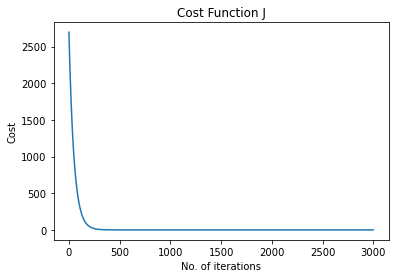

In [39]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()

In [40]:
#prediction of january(2013-2015) across india
import numpy as np
newB=[74.76, 2.13]

def rmse(y,y_pred):
    rmse= np.sqrt(sum(y-y_pred))
    return rmse
   

y_pred=x.dot(newB)

dt = pd.DataFrame({'Actual': y, 'Predicted': y_pred})  
dt=pd.concat([new_data, dt], axis=1)
dt

,year,wqi,Actual,Predicted
0,2005,72.111429,72.111429,71.594179
1,2006,71.224571,71.224571,72.297695
2,2007,72.549000,72.549000,73.001210
3,2008,72.570943,72.570943,73.704726
4,2009,74.085193,74.085193,74.408242
5,2010,74.648723,74.648723,75.111758
6,2011,75.647013,75.647013,75.815274
7,2012,78.969041,78.969041,76.518790
8,2013,75.009425,75.009425,77.222305
9,2014,76.853551,76.853551,77.925821


In [41]:
#testing the accuracy of the model

from sklearn import metrics
from sklearn.metrics import r2_score

  
a=r2_score(y, y_pred)

print('r2_score of this model is :',a*100,'%')

r2_score of this model is : 70.02547390767178 %


<h1> <center> Predicted vs Actual WQI (Bar-Graph)  </center></h1>

Text(0, 0.5, 'WQI')

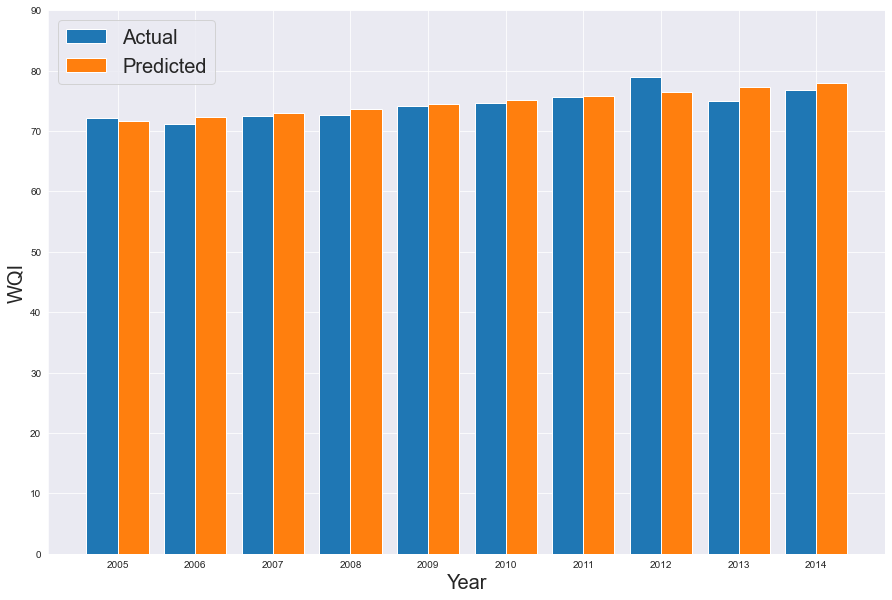

In [42]:
x_actual=dt.Actual
x_predict=dt.Predicted
y=dt.year
w=0.4

sb.set_style(style='darkgrid')
plt.figure(figsize=(15,10))
bar1=np.arange(len(y))
bar2=[ i+w for i in bar1]

plt.ylim(ymin=0,ymax=90)
plt.xticks(bar1+w/2,y)
plt.bar(bar1,x_actual,w, label='Actual')
plt.bar(bar2,x_predict,w, label='Predicted')
plt.legend(fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.ylabel('WQI', fontsize=20)

<h1> <center> Predicted vs Actual WQI (Regression Plot)  </center></h1>

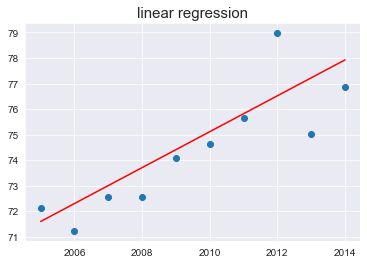

In [43]:
#plotting the actual and predicted results using regression plot
x_axis=dt.year
y_axis=dt.Actual
y1_axis=dt.Predicted

plt.scatter(x_axis,y_axis)
plt.plot(x_axis,y1_axis,color='r')
plt.title("linear regression", fontsize=15)

plt.show()
